In [59]:
#import the standard packages for data science
import pandas as pd
import xtarfile as tarfile
import missingno as msno
import folium
import matplotlib.pyplot as plt
import numpy as np

In [2]:
stations = pd.read_csv('stations.csv')
temps = pd.read_csv('Temps.csv')

In [3]:
datex = "20180101 00:00"

temps["date"] = pd.to_datetime(temps['date'], format='%Y%m%d %H:%M')

In [48]:
temps.dropna(axis=1).shape

(87600, 4)

In [4]:
def get_hour(x):
    return x.floor('H')

hourlyMean = temps.groupby(temps['date'].apply(get_hour)).apply(lambda x: x.mean() - 273.15)


C:\Users\Asus\AppData\Local\Temp\ipykernel_3472\1467157273.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  hourlyMean = temps.groupby(temps['date'].apply(get_hour)).apply(lambda x: x.mean() - 273.15)


In [7]:
hourlyMean.shape

(8760, 533)

In [8]:
goodhours = hourlyMean[hourlyMean.columns[hourlyMean.isnull().mean() < 0.001]]

In [9]:
goodhours.shape

(8760, 246)

In [10]:
m = folium.Map(location=[45.188529, 5.724524], zoom_start=12)
for i in goodhours.columns:
    folium.Marker([stations.set_index("number_sta").loc[int(i), 'lat'], stations.set_index("number_sta").loc[int(i), 'lon']]).add_to(m)
    
m

In [11]:
goodhours.fillna(method='ffill', inplace=True)
goodhours.columns = [int(i) for i in goodhours.columns]

C:\Users\Asus\AppData\Local\Temp\ipykernel_3472\156039044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goodhours.fillna(method='ffill', inplace=True)


In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(random_state=0).fit(goodhours.T)

print(kmeans.labels_)

[3 3 3 1 3 3 1 5 0 5 5 5 5 0 0 6 5 5 0 5 5 5 2 1 2 2 0 1 6 2 2 2 6 0 0 5 5
 0 2 0 7 3 7 7 7 1 4 4 4 7 2 4 7 4 7 7 7 7 7 7 7 4 4 2 2 0 4 4 7 6 1 6 7 7
 7 7 1 1 7 2 2 2 2 0 2 2 2 2 2 0 0 2 2 0 0 0 7 1 1 7 1 3 5 4 4 3 3 0 3 3 5
 2 7 4 4 4 4 4 4 4 4 4 4 4 4 7 4 4 4 4 4 4 4 4 3 5 3 3 1 1 6 3 5 3 1 3 1 1
 3 3 3 1 1 6 1 1 3 1 1 1 1 7 7 1 1 1 1 1 7 4 1 6 3 3 3 6 3 6 1 1 1 1 2 4 4
 7 7 7 4 3 3 3 3 1 3 3 5 6 1 6 3 6 3 5 6 1 6 3 5 6 3 3 6 3 6 5 3 7 7 0 2 2
 4 2 2 2 2 2 0 2 0 4 0 0 2 2 0 0 4 0 4 4 4 4 5 4]


In [22]:
len(kmeans.labels_)

246

In [26]:
def color(clust):
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'black', 'lightred', 'pink', 'gray', 'beige']
    return colors[clust]

In [27]:
m = folium.Map(location=[45.188529, 5.724524], zoom_start=12)
for i in range(len(kmeans.labels_)):
    folium.Marker([stations.set_index("number_sta").loc[int(goodhours.columns[i]), 'lat'],
                   stations.set_index("number_sta").loc[int(goodhours.columns[i]), 'lon']],
                  popup=kmeans.labels_[i],
                  icon=folium.Icon(color= color(kmeans.labels_[i]))
                  ).add_to(m)
m

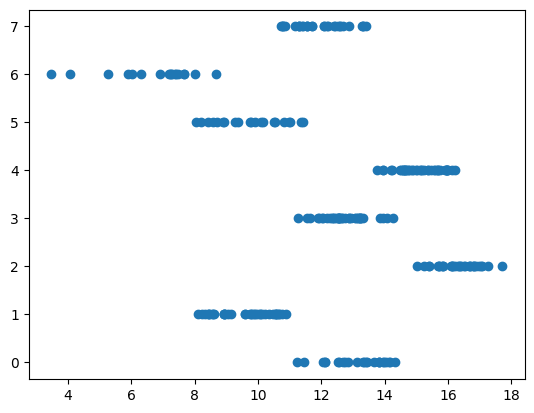

In [28]:
goodstations = stations[stations["number_sta"].isin(goodhours.columns)]

plt.scatter(goodhours.mean(axis = 0), kmeans.labels_)

In [30]:
goodhours.shape

(8760, 246)

In [31]:
len(goodhours.columns)

246

## La bayésiannitude

In [48]:
from numpy.random import normal


In [32]:
N = len(goodhours.columns)
T = len(goodhours)

In [55]:
Y = goodhours.rename(columns = dict(zip(goodhours.columns, range(N)))).reset_index(drop=True).apply(round)

In [116]:
Y[:10]

,0,1,2,3,4,5,6,7,8,9,...,236,237,238,239,240,241,242,243,244,245
0,6.0,7.0,7.0,2.0,9.0,7.0,2.0,-1.0,5.0,5.0,...,6.0,9.0,9.0,8.0,10.0,10.0,8.0,8.0,6.0,8.0
1,5.0,6.0,7.0,1.0,8.0,7.0,2.0,-1.0,5.0,4.0,...,7.0,9.0,10.0,9.0,9.0,10.0,8.0,7.0,5.0,8.0
2,4.0,6.0,7.0,1.0,8.0,7.0,2.0,0.0,6.0,5.0,...,9.0,9.0,9.0,9.0,8.0,10.0,8.0,8.0,4.0,7.0
3,5.0,5.0,7.0,2.0,8.0,6.0,1.0,1.0,6.0,5.0,...,9.0,8.0,9.0,8.0,8.0,9.0,7.0,8.0,4.0,7.0
4,5.0,5.0,7.0,2.0,8.0,6.0,1.0,2.0,7.0,4.0,...,9.0,7.0,8.0,8.0,7.0,9.0,7.0,8.0,4.0,7.0
5,4.0,5.0,6.0,1.0,8.0,6.0,1.0,2.0,7.0,4.0,...,8.0,7.0,7.0,8.0,6.0,8.0,7.0,7.0,4.0,6.0
6,3.0,5.0,6.0,1.0,8.0,5.0,1.0,1.0,4.0,5.0,...,8.0,7.0,5.0,8.0,6.0,9.0,7.0,7.0,4.0,4.0
7,3.0,4.0,6.0,1.0,7.0,5.0,1.0,0.0,2.0,4.0,...,8.0,6.0,3.0,8.0,6.0,8.0,6.0,7.0,4.0,3.0
8,3.0,4.0,6.0,1.0,8.0,6.0,1.0,-1.0,5.0,5.0,...,9.0,7.0,8.0,8.0,8.0,9.0,7.0,7.0,5.0,5.0
9,5.0,6.0,7.0,3.0,9.0,7.0,2.0,-0.0,9.0,5.0,...,10.0,9.0,11.0,9.0,10.0,10.0,10.0,8.0,5.0,9.0


In [ ]:
alpha = 1


In [57]:
max([max(Y[i]) for i in range(N)])

39.0

In [58]:
min([min(Y[i]) for i in range(N)])

-23.0

In [68]:
Cp = 1006
g = 9.81
p0 = 1013.25

def pressure(T, z):
    return p0*np.exp(-7*g*z/(2*Cp*(T + 273.15)))

def temperature(p,z):
    return 7*g*z/(2*Cp*np.log(p0/p)) - 273.15

In [72]:
elevations = goodstations["height_sta"].values

X = pd.DataFrame(index = range(T), columns = range(N))
for i in range(N):
    X[i][0] = np.mean([pressure(Y[i][j], elevations[i]) for j in range(int(T/12))])

In [73]:
X

,0,1,2,3,4,5,6,7,8,9,...,236,237,238,239,240,241,242,243,244,245
0,970.621137,973.178842,981.647689,909.206957,982.796149,973.341696,893.093382,877.163014,946.81594,886.4008,...,980.4459,986.323133,1007.391831,967.462814,995.970566,994.756301,1006.530174,966.276595,914.523715,996.08089
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
X.loc[0].max() - X.loc[0].min()

238.01920960158213

In [109]:
def Dirichlet(alpha, N):
    X = []
    for n in range(N):
        if np.random.random() < alpha/(alpha + n):
            X.append(np.random.normal(0,50))
        else:
            xs = list(set(X))
            print(xs)
            ps = []
            for x in xs:
                p = np.count_nonzero(X == x)/(alpha+n)
                print(p)
                ps.append(p)
            ps = ps/np.sum(ps)
            print(ps)
            X.append(np.random.choice(xs, p=ps))
    return X

In [110]:
Dirichlet(1, 10)

[-21.110330498291553]
0.0
[nan]


C:\Users\Asus\AppData\Local\Temp\ipykernel_3472\2125922939.py:14: RuntimeWarning: invalid value encountered in divide
  ps = ps/np.sum(ps)


ValueError: probabilities contain NaN

In [125]:
def cluster_selection(Z_list):
    OM = []
    for i in range(len(Z_list)):
        omega = np.zeros((N, N))
        for n in range(N):
            for m in range(n):
                if Z_list[i][n] == Z_list[i][m]:
                    omega[n,m] = 1
        OM.append(omega)
    om_avg = np.mean(OM, axis = 0)
    dists = [np.linalg.norm(OM[i] - om_avg, ord = 'fro') for i in range(len(OM))]
    i = np.argmin(dists)
    return Z_list[i]
    

In [126]:
Z_list = []
for i in range(100):
    Z = np.random.randint(0, 10, N)
    Z_list.append(Z)

In [127]:
cluster_selection(Z_list)

array([6, 8, 3, 4, 1, 8, 3, 1, 4, 6, 2, 3, 7, 3, 4, 5, 6, 1, 8, 3, 8, 5,
       9, 9, 1, 2, 1, 9, 5, 2, 6, 7, 3, 0, 1, 1, 4, 9, 5, 2, 7, 2, 9, 4,
       5, 7, 0, 6, 8, 5, 5, 4, 8, 5, 6, 2, 2, 0, 6, 0, 3, 4, 2, 1, 2, 6,
       2, 0, 9, 8, 0, 4, 7, 9, 8, 0, 6, 9, 8, 5, 5, 9, 4, 3, 5, 8, 2, 5,
       4, 2, 6, 6, 2, 3, 6, 5, 2, 2, 2, 4, 4, 8, 7, 5, 9, 7, 3, 8, 1, 0,
       9, 4, 2, 1, 6, 0, 9, 5, 8, 4, 3, 0, 8, 9, 6, 1, 6, 4, 7, 9, 9, 8,
       5, 7, 6, 5, 6, 3, 5, 3, 8, 0, 7, 7, 3, 6, 2, 5, 4, 6, 4, 5, 8, 6,
       7, 6, 1, 9, 9, 2, 4, 9, 7, 4, 0, 4, 2, 3, 5, 2, 3, 3, 9, 8, 1, 7,
       1, 6, 7, 6, 1, 1, 9, 8, 2, 0, 0, 1, 5, 1, 3, 2, 1, 8, 0, 8, 5, 4,
       1, 4, 5, 2, 0, 9, 7, 4, 8, 7, 6, 1, 8, 7, 2, 6, 3, 9, 7, 8, 7, 9,
       0, 3, 0, 7, 9, 5, 1, 6, 7, 3, 4, 1, 0, 7, 8, 7, 2, 3, 3, 3, 7, 3,
       8, 8, 3, 8])

In [129]:
stations['height_sta'].describe()

count     545.000000
mean      566.642097
std       476.435000
min         1.000000
25%       214.000000
50%       452.000000
75%       822.000000
max      3845.000000
Name: height_sta, dtype: float64